In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

In [14]:
fn = '/mnt_bls0/datax3/collate/AGBT17B_999_70/spliced_blc00010203040506o7o0111213141516o7o0212223242526o7o031323334353637_guppi_58090_40453_HIP43223_0021.gpuspec.0000.fil'
# /datax/users/bryanb/bl-interns/bbrzycki/jupyter-notebooks/data_dump/1024.fil
# /datax/users/eenriquez/voyager_test/blc07_guppi_57650_67573_Voyager1_0002.gpuspec.0000.fil

In [15]:
fil = Waterfall(fn)

blimpy.file_wrapper WARNING  Selection size of 104.00 GB, exceeding our size limit 1.00 GB. Instance created, header loaded, but data not loaded, please try another (t,v) selection.


In [16]:
fil.header

{'az_start': 0.0,
 'data_type': 1,
 'fch1': 8438.964842353016,
 'foff': -2.7939677238464355e-06,
 'machine_id': 20,
 'nbits': 32,
 'nchans': 1744830464,
 'nifs': 1,
 'source_name': 'HIP43223',
 'src_dej': <Angle 18.7477 deg>,
 'src_raj': <Angle 8.80492 hourangle>,
 'telescope_id': 6,
 'tsamp': 18.253611008,
 'tstart': 58090.468206018515,
 'za_start': 0.0}

In [5]:
import sys, os
sys.path.append('/datax/users/bryanb/bl-interns/bbrzycki')
sys.path.insert(1,'/datax/users/bryanb/turbo_seti')

In [6]:
import ml_search

In [7]:
ml_search.split_filterbank

<function ml_search.filterbank_split.split_filterbank>

In [6]:
f_sample_num = 2**22

In [17]:


fch1 = read_header(fn)[b'fch1']
nchans = read_header(fn)[b'nchans']
ch_bandwidth = read_header(fn)[b'foff']
f_start = fch1
f_stop = fch1 + f_sample_num * ch_bandwidth

frame = Waterfall(fn, f_start=f_start, f_stop=f_stop)
frame.write_to_fil('data_dump/%s.fil' % f_sample_num)

blimpy.file_wrapper WARNING  Given f_stop < f_start, assuming reversed values.
blimpy.waterfall INFO     Conversion time: 0.08sec


In [13]:
fch1 = read_header(fn)[b'fch1']
nchans = read_header(fn)[b'nchans']
ch_bandwidth = read_header(fn)[b'foff']
f_start = fch1
f_stop = fch1 + nchans * ch_bandwidth
print(f_start, f_stop)

(8438.964842353016, 3563.964842353016)


In [7]:
fn_split = 'data_dump/%s.fil' % f_sample_num

In [8]:
fil_split = Waterfall(fn_split)

In [9]:
fil_split.header

{'az_start': 0.0,
 'data_type': 1,
 'fch1': 8438.964842353016,
 'foff': -2.7939677238464355e-06,
 'machine_id': 20,
 'nbits': 32,
 'nchans': 4194304,
 'nifs': 1,
 'source_name': 'HIP43223',
 'src_dej': <Angle 18.7477 deg>,
 'src_raj': <Angle 8.80492 hourangle>,
 'telescope_id': 6,
 'tsamp': 18.253611008,
 'tstart': 58090.468206018515,
 'za_start': 0.0}

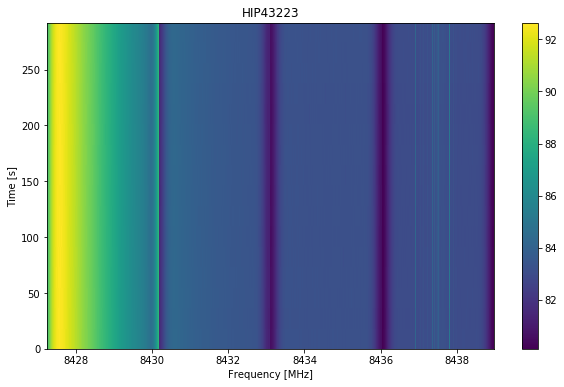

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
fil_split.plot_waterfall()

extracting integration 0...


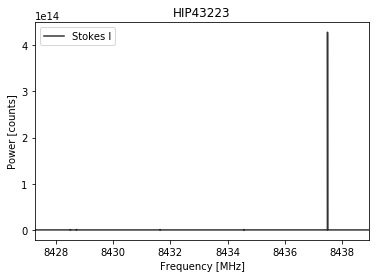

In [11]:
fil_split.plot_spectrum()

In [23]:
import turbo_seti

In [24]:
from turbo_seti.findoppler.findopp import FinDoppler

In [25]:
# Stuff needed for LOFAR version. will remove
obs_info = {}
obs_info['pulsar'] = 0  # Bool if pulsar detection.
obs_info['pulsar_found'] = 0  # Bool if pulsar detection.
obs_info['pulsar_dm'] = 0.0  # Pulsar expected DM.
obs_info['pulsar_snr'] = 0.0 # SNR
obs_info['pulsar_stats'] = np.zeros(6)
obs_info['RFI_level'] = 0.0
obs_info['Mean_SEFD'] = 0.0
obs_info['psrflux_Sens'] = 0.0
obs_info['SEFDs_val'] = [0.0]
obs_info['SEFDs_freq'] = [0.0]
obs_info['SEFDs_freq_up'] = [0.0]

find_seti_event = FinDoppler(fn_split, max_drift = 10.0, snr = 25.0, out_dir = 'data_dump/', obs_info=obs_info)
find_seti_event.search()

turbo_seti.findoppler.data_handdler INFO     File .fil detected. Attempting to create .h5 file in current directory...
blimpy.waterfall INFO     Conversion time: 9.41sec
blimpy.file_wrapper INFO     Skipping loading data ...
blimpy.file_wrapper INFO     Skipping loading data ...
turbo_seti.findoppler.findopp INFO     {u'telescope_id': 6, u'nbits': 32, u'fch1': 8438.964842353016, u'data_type': 1, u'nchans': 2097153, u'tsamp': 18.253611008, u'foff': -2.7939677238464355e-06, u'DIMENSION_LABELS': array(['frequency', 'feed_id', 'time'], dtype=object), u'src_raj': <Angle 8.80492 hourangle>, u'src_dej': <Angle 18.7477 deg>, u'tstart': 58090.468206018515, u'az_start': 0.0, u'source_name': 'HIP43223', u'za_start': 0.0, u'machine_id': 20, u'nifs': 1}
turbo_seti.findoppler.findopp INFO     A new FinDoppler instance created!
turbo_seti.findoppler.findopp INFO     Start ET search for data_dump/2097153.fil
turbo_seti.findoppler.findopp INFO     Start searching for coarse channel: 1
turbo_seti.findop

KeyboardInterrupt: 

In [35]:
fn_split

'data_dump/4194304.fil'